In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Hypothesis Testing
</font>
</h1>

<h3 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Getting settled!
</font>
</h3>

What is hypothesis testing?

Hypothesis Testing is a type of statistical analysis in which you put your assumptions about a population's parameters to test.

It is used to estimate the relationship between some statistical variables in between some data (using their general distributions characteristics).

What is our metric for hypothesis testing?

+ Simple metrics - Mean?

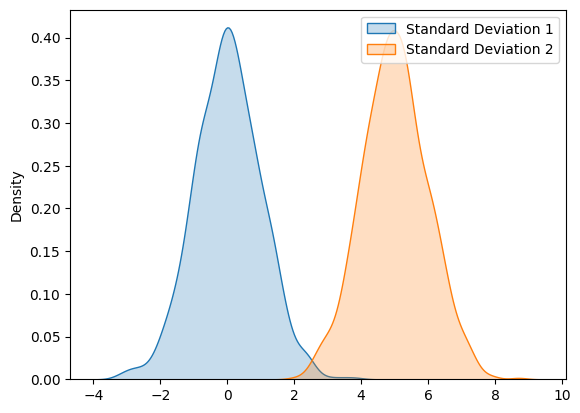

In [2]:
mean1 = 0
mean2 = 5
std = 1

data1 = np.random.normal(mean1, std, 1000)
data2 = np.random.normal(mean2, std, 1000)

sns.kdeplot(data1, label='Standard Deviation 1', fill=True)
sns.kdeplot(data2, label='Standard Deviation 2', fill=True)

plt.legend()
plt.show()

Mean is neccessary but not enough!

Why not enough?

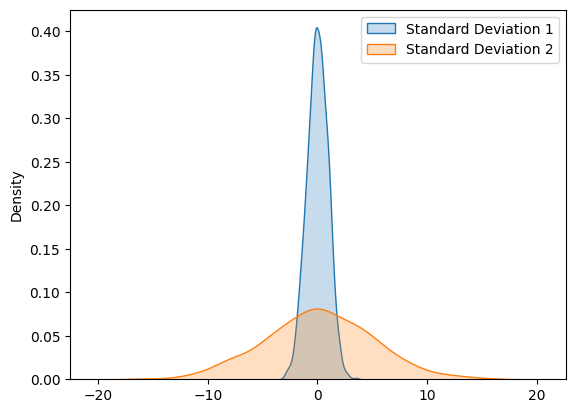

In [3]:
mean = 0
std1 = 1
std2 = 5

data1 = np.random.normal(mean, std1, 1000)
data2 = np.random.normal(mean, std2, 1000)

sns.kdeplot(data1, label='Standard Deviation 1', fill=True)
sns.kdeplot(data2, label='Standard Deviation 2', fill=True)

plt.legend()
plt.show()

+ Compound metrics - Mean and std?

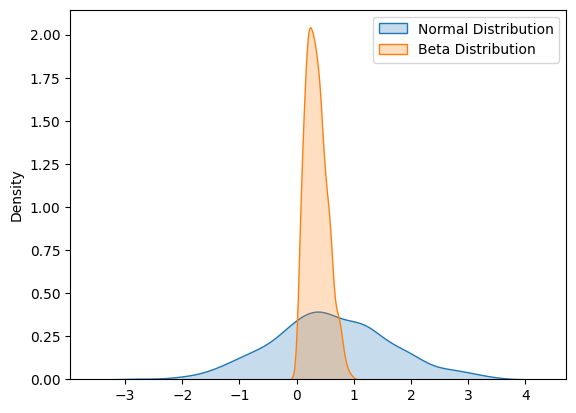

In [4]:
from scipy.stats import norm, beta

mean = 0.6
std_normal = 1

alpha_beta = 2
beta_beta = alpha_beta / (mean / (1 - mean) - 1)

data_normal = np.random.normal(mean, std_normal, 1000)
data_beta = np.random.beta(alpha_beta, beta_beta, 1000)

sns.kdeplot(data_normal, label='Normal Distribution', fill=True)
sns.kdeplot(data_beta, label='Beta Distribution', fill=True)

plt.legend()
plt.show()

So we need another qualification:

+ Complex metrics - Mean, std and distribution!

+ Some examples of this type are T-tests and U-test that we will review explicitly!

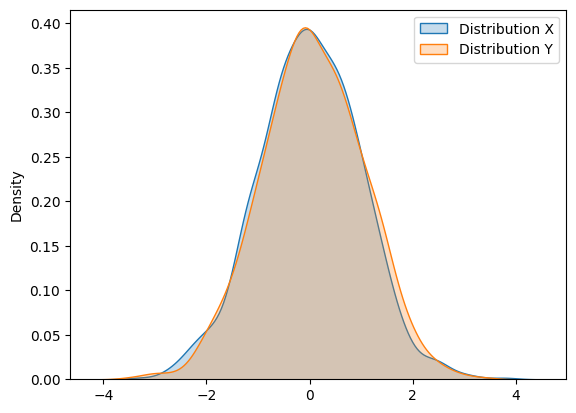

In [5]:
mean = 0
std = 1

data_x = np.random.normal(mean, std, size=1000)
data_y = np.random.normal(mean, std, size=1000)

sns.kdeplot(data_x, label='Distribution X', fill=True)
sns.kdeplot(data_y, label='Distribution Y', fill=True)

plt.legend()
plt.show()

What are the components of a hypothesis test?

+ Null hypothesis (aka H0), what we are evaluating!

+ Alternative hypothesis (aka H1), what we are not evaluating in the eligible answer space!

+ The statistic.

+ Doing tests will usually end up in having a P-value for it.

In python, this P-value can be calculated using a library-based test, or derived by pure math using an statistic(not statitics!).

What is a P-value?

In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct.

Check out the graphs below:

C:\Users\ROG\AppData\Local\Temp\ipykernel_12376\3870978088.py:2: RuntimeWarning: divide by zero encountered in divide
  return k / x


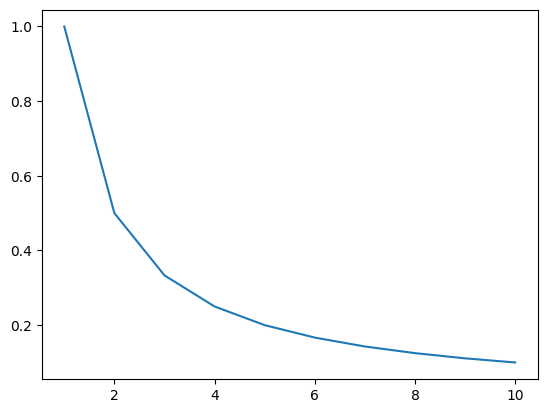

In [6]:
def f(x, k):
    return k / x

x = np.arange(0,11,1)
y = f(x, 1)

plt.plot(x, y)
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_12376\3870978088.py:2: RuntimeWarning: divide by zero encountered in divide
  return k / x


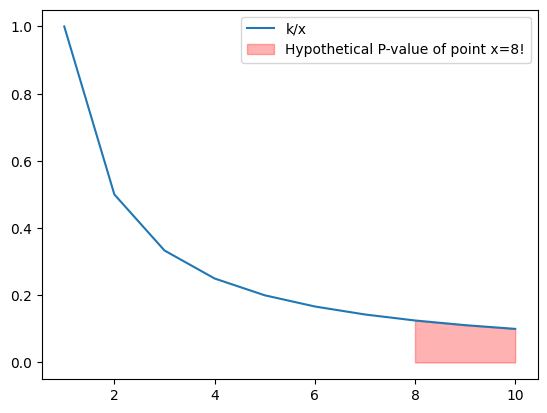

In [7]:
x = np.arange(0,11,1)
y = f(x, 1)

plt.plot(x, y, label='k/x')
plt.fill_between(x, y, where=(x >= 8), color='red', alpha=0.3, label='Hypothetical P-value of point x=8!')

plt.legend()
plt.show()

Doesen't this remind you of something?

Watch Out! Don't get them mixed up!

What does a hypothesis test confidence mean?

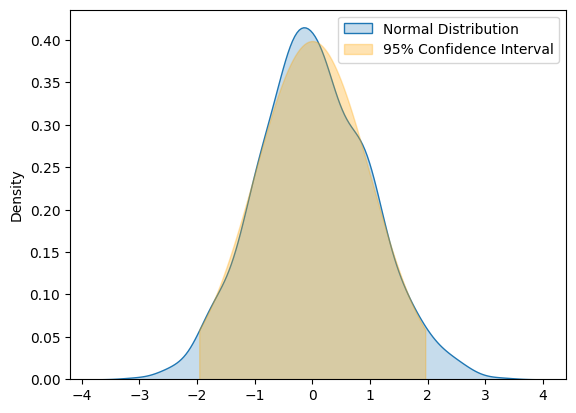

In [8]:
from scipy.stats import norm
mean = 0
std = 1.0

data = np.random.normal(mean, std, 1000)
sns.kdeplot(data, label='Normal Distribution', fill=True)
lower_bound, upper_bound = norm.interval(0.95, loc=mean, scale=std)
x = np.linspace(lower_bound, upper_bound, 100)
y = norm.pdf(x, loc=mean, scale=std)
plt.fill_between(x, y, alpha=0.3, color='orange', label='95% Confidence Interval')

plt.legend()
plt.show()

How should I use P-value?

A Hypothesis test is not rejected (The null hypothesis is accepted) if (P-value >= 1-CI)

A Hypothesis test is rejected (The alternative hypothesis is accepted) if (P-value < 1-CI)

+ We imply that if a hypothesis is not rejected, there were not enough evidence to reject it; not that it is accepted!

Now that we know about hypothesis tests, what distribution-based metric should we use? (We are talking specifically about this course!)

+ If my data is normally distributed, I will use a T-test.

+ If my data in not normally distributed, I will use a non-parametric test, called Mann-Whitney U-test.

Before digging in, you must know:

"Should I use these tests/transformations blindly using a few given rules or formulas?"

'I would maintain that including the adverb "blindly" in this question makes the answer obvious. These transformations/tests are not intended to be used as blind procedures, but rather are embedded within disciplined modeling and exploratory workflows. Blind application of either transformation or test could just as well result in a worse analysis or result.'

<h3 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Normality test
</font>
</h3>

So as our first step, we have to determine our data distribution.

We usually accept a data's normality based on its distribution plot, but if we were not sure about our observations, we may use some other tests just to make sure!

+ Distribution is prior to normality tests specially in n>5000

Often two tests are used in this matter:

+ Shapiro-Wilk normality test

SW uses the mean and std of the given data to generate a normal data distribution and then uses Monte-Carlo simulation to find the ratio of common area.

+ D'Agostino-Pearson normality test

DP tests skewness and kurtosis of any given data and quantifies how far they are from being a Gaussian(Normal) distributed data. It actually uses the shape of the data to determine if it is normal. 

In [9]:
normal_data = np.random.normal(loc=0, scale=1, size=1000)

<Axes: ylabel='Count'>

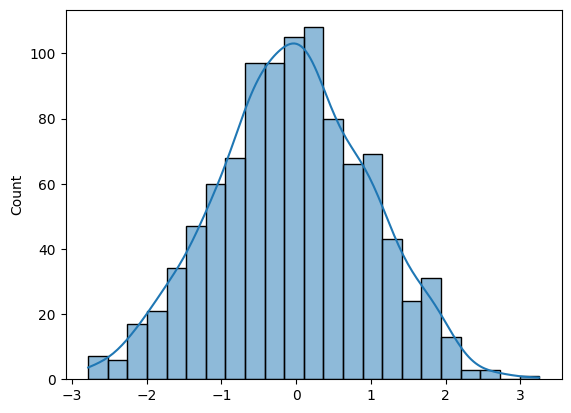

In [10]:
sns.histplot(normal_data, kde=True)

In [11]:
binomial_data = np.random.binomial(n=10, p=0.5, size=1000)

<Axes: ylabel='Count'>

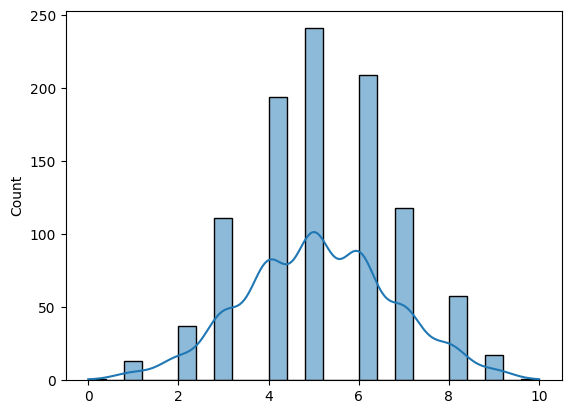

In [12]:
sns.histplot(binomial_data, kde=True)

Shapiro normality results:

In [13]:
normal_test_stat, normal_p_value = sp.stats.shapiro(normal_data)
normal_p_value

0.32915669679641724

In [14]:
binomial_test_stat, binomial_p_value = sp.stats.shapiro(binomial_data)
binomial_p_value

5.110750147738208e-14

D'Agostino normality results:

In [15]:
normal_dagostino_test_stat, normal_dagostino_p_value = sp.stats.normaltest(normal_data)
normal_dagostino_p_value

0.3446221776916776

In [16]:
binomial_dagostino_test_stat, binomial_dagostino_p_value = sp.stats.normaltest(binomial_data)
binomial_dagostino_p_value

0.5350138266930026

<h3 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
T-test
</font>
</h3>

A T-test can be one-way or two-way. The acceptance interval in these situations is different but the basis of the test is the same.

We are specifically talking about mean of two samples in this session, but you can compare other variables of the normal distribution in hypothesis testing using T-test. (For example variance of two different distributions.)

We will calculate an statistic for our null hypothesis and then check if it is accepted in our acceptence inerval.

Note: A T-test is conducted with different statistics (Plural form of statistic!) when std of the population is known or not known. We will assume that all of our data is our whole population and therefore, we can conduct it in a way that our population std is known. 

Doing a T-test for mean equality in two different sample sets can be done by these steps:

+ 1) Find the proper statistic. In this case, it will be the statistic of a mean equality test while our population std is known.

+ 2) Calculate the value of the given statistic. 

+ 3) Determine whether the test must be conducted in one or two way.

+ 4) Using step 3, find the acceptance interval for statistic.

+ 5) If our statistic was in the acceptance interval, the test is accepted; else the null hypothesis in rejected.

The statistic for the T-test conducted given above conditions is:

\begin{align*}
& \hspace{14em} U = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{\sigma^2_{(x)}}{n_{(x)}} + \frac{\sigma^2_{(y)}}{n_{(y)}}}} \\
\end{align*}

One-way acceptance interval:

\begin{align*}
& \hspace{14em} [-k_{(\alpha)}, \infty]\\


& \text{Or:} \\


& \hspace{14em} [-\infty, k_{(\alpha)}]
\end{align*}


Two-way acceptance interval:

\begin{align*}
& \hspace{14em} [-k_{(\alpha/2)}, k_{(\alpha/2)}]
\end{align*}


In [17]:
#You can use the syntax below to find k(1-alpha) or -(k(alpha)) (Because of the standard normal line symmetry)
sp.stats.norm.ppf(.01), sp.stats.norm.ppf(.99)

(-2.3263478740408408, 2.3263478740408408)

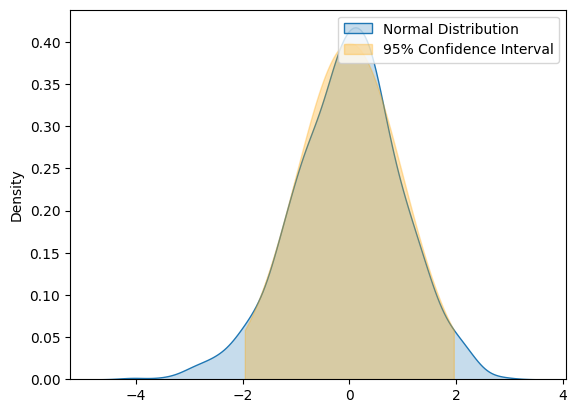

In [18]:
from scipy.stats import norm
mean = 0
std = 1.0

data = np.random.normal(mean, std, 1000)
sns.kdeplot(data, label='Normal Distribution', fill=True)
lower_bound, upper_bound = norm.interval(0.95, loc=mean, scale=std)
x = np.linspace(lower_bound, upper_bound, 100)
y = norm.pdf(x, loc=mean, scale=std)
plt.fill_between(x, y, alpha=0.3, color='orange', label='95% Confidence Interval')

plt.legend()
plt.show()

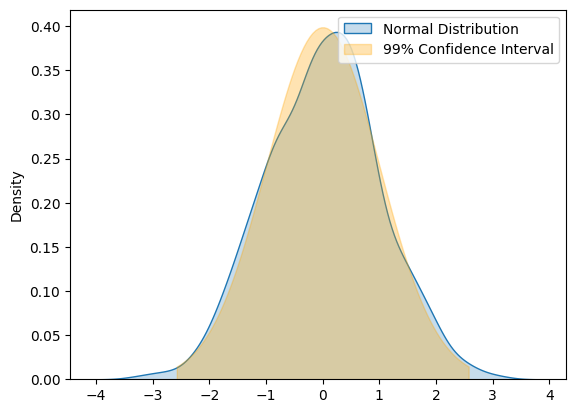

In [19]:
from scipy.stats import norm
mean = 0
std = 1.0

data = np.random.normal(mean, std, 1000)
sns.kdeplot(data, label='Normal Distribution', fill=True)
lower_bound, upper_bound = norm.interval(0.99, loc=mean, scale=std)
x = np.linspace(lower_bound, upper_bound, 100)
y = norm.pdf(x, loc=mean, scale=std)
plt.fill_between(x, y, alpha=0.3, color='orange', label='99% Confidence Interval')

plt.legend()
plt.show()

We will find the P-value of a T-test by this method, considering that U = T-test statistic value.

When to use?

How to use? On what side?

In [20]:
#One-Way
U = 2.17
p_value = sp.stats.norm.sf(abs(U))
p_value

0.015003422973732207

In [ ]:
#One-Way?!
U = -3.17
p_value = sp.stats.norm.sf(abs(U))
p_value

0.0007621946880672346

In [22]:
#Two-Way
U = 2.17
p_value = sp.stats.norm.sf(abs(U))*2
p_value

0.030006845947464413

In [23]:
#One-Way
U = 1.17
p_value = sp.stats.norm.sf(abs(U))
p_value

0.12100048442101824

In [24]:
#Two-Way
U = 1.17
p_value = sp.stats.norm.sf(abs(U))*2
p_value

0.24200096884203648

We can do all this procedure by using a library-based T-test:

In [25]:
sample1 = np.random.normal(loc=0, scale=1, size=1000)
sample2 = np.random.normal(loc=0.5, scale=1, size=1000)

In [26]:
t_statistic, p_value = sp.stats.ttest_ind(sample1, sample2)
p_value

7.666307075747683e-32

In [27]:
t_statistic, p_value = sp.stats.ttest_ind(sample1, sample2, alternative='greater')
p_value

1.0

<h3 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
U-test
</font>
</h3>

Mann-Whitney test actually checks if two samples are derived from the same distribution(population to be precise!).

If two samples are derived from the same population, their mean will be the same omitting the uncertainty and randomness.

In [28]:
sample1 = np.random.exponential(scale=1, size=1000)
sample2 = np.random.gamma(shape=2, scale=1, size=1000)

<Axes: ylabel='Count'>

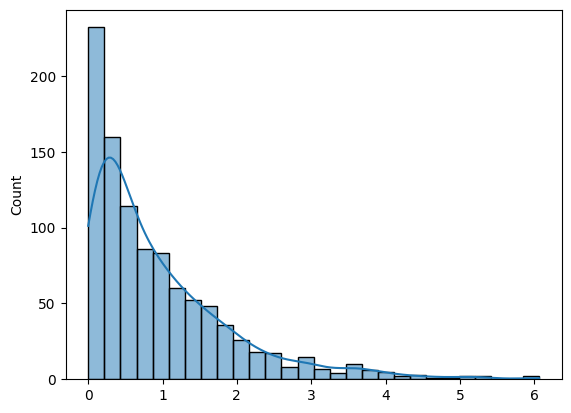

In [29]:
sns.histplot(sample1, kde=True)

<Axes: ylabel='Count'>

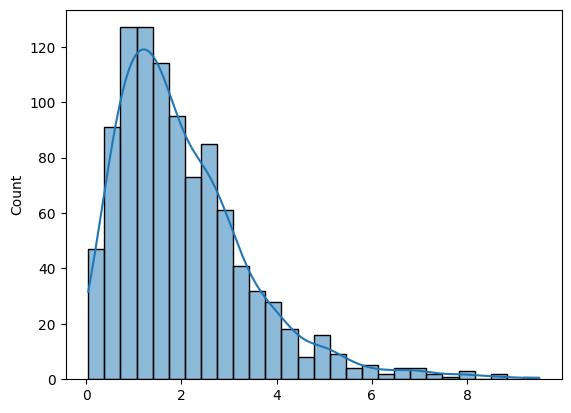

In [30]:
sns.histplot(sample2, kde=True)

In [31]:
u_statistic, p_value = sp.stats.mannwhitneyu(sample1, sample2)
p_value

1.3349918169335636e-98

In [32]:
sample1 = np.random.exponential(scale=1, size=1000)
sample2 = np.random.exponential(scale=1, size=1000)

<Axes: ylabel='Count'>

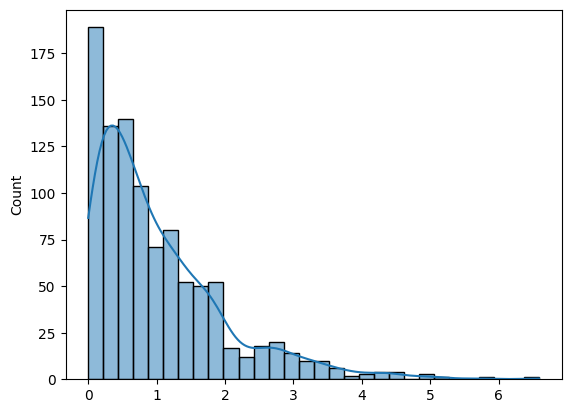

In [33]:
sns.histplot(sample1, kde=True)

<Axes: ylabel='Count'>

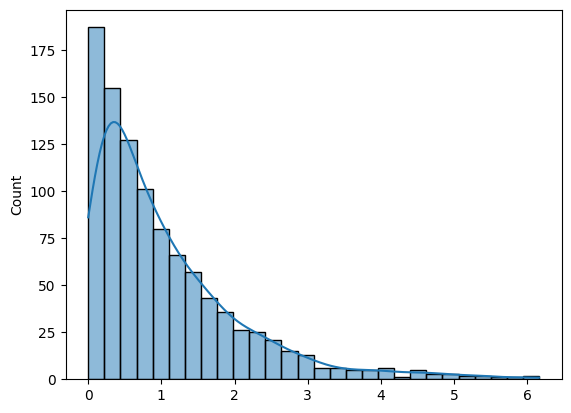

In [34]:
sns.histplot(sample2, kde=True)

In [35]:
u_statistic, p_value = sp.stats.mannwhitneyu(sample1, sample2)
p_value

0.9223621868869546

In [36]:
sample1 = np.random.exponential(scale=1, size=1000)
sample2 = np.random.exponential(scale=3, size=1000)

<Axes: ylabel='Count'>

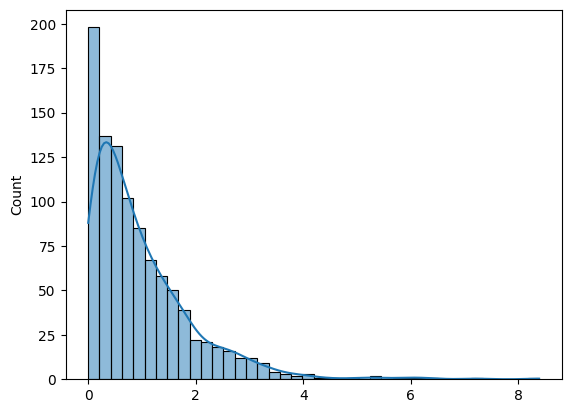

In [37]:
sns.histplot(sample1, kde=True)

<Axes: ylabel='Count'>

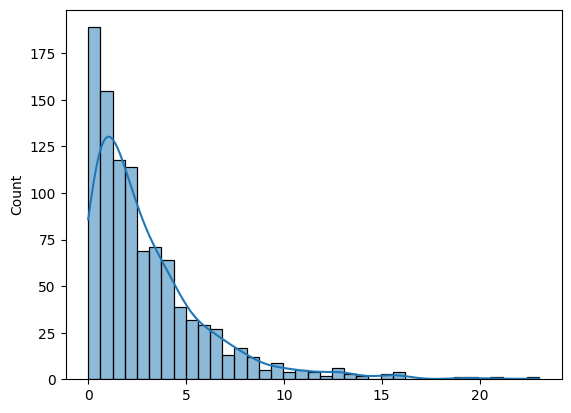

In [38]:
sns.histplot(sample2, kde=True)

In [39]:
u_statistic, p_value = sp.stats.mannwhitneyu(sample1, sample2, alternative="greater")
p_value

1.0

<h3 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Power transformation
</font>
</h3>

What is a power transformation?

+  In statistics, data transformation is the application of a deterministic (with no uncertainty) mathematical function to each point in a data set—that is, each data point zi is replaced with the transformed value yi = f(zi), where f is the function.

+  Two famous power transformers that we will check out are BoxCox and Yeo-Johnson power transformers. (Another one would be asinh(x) if you wanted to dig in.)

+ They're both based on log and exponential of lambda parameter, but BoxCox transformation requires all data to be positive, when Yeo-Johnson does not.

+ Both Yeo-Johnson and BoxCox transformations will use a lambda parameter to transform the data that can be a parameter of what kind of data are we spreading, small or large. (You don't have to worry about lambda as it is usually found by the algorithm itself.)

+ You can check the link below for more info about power transformers:

https://maths-people.anu.edu.au/~johnm/r-book/4edn/Ch2%263-powerTransforms.pdf

<Axes: ylabel='Count'>

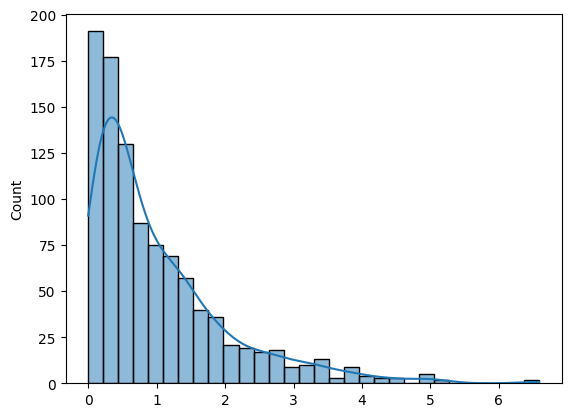

In [40]:
exponential_data = np.random.exponential(scale=1, size=1000)
sns.histplot(exponential_data, kde=True)

In [41]:
boxcox_transformed_data, lambda_boxcox = sp.stats.boxcox(exponential_data)
lambda_boxcox

0.24777516818182196

<Axes: ylabel='Count'>

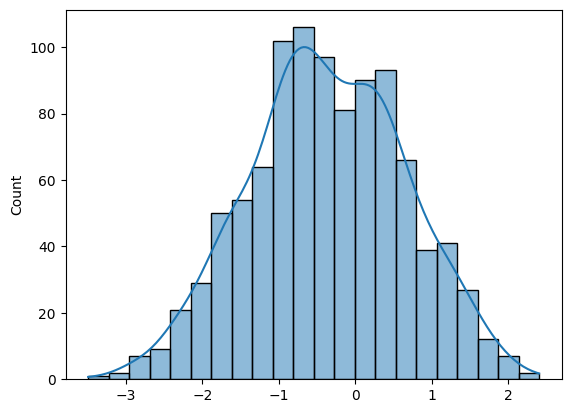

In [42]:
sns.histplot(boxcox_transformed_data, kde=True)

In [43]:
_, p_value_boxcox = sp.stats.shapiro(boxcox_transformed_data)
p_value_boxcox

0.10087993741035461

In [44]:
yeojohnson_transformed_data, lambda_yeojohnson = sp.stats.yeojohnson(exponential_data)
lambda_yeojohnson

-0.835468804813699

<Axes: ylabel='Count'>

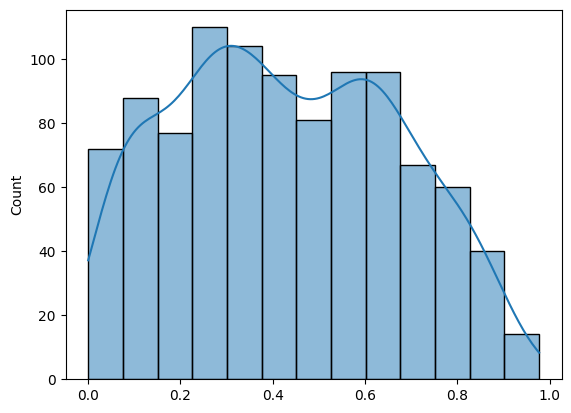

In [45]:
sns.histplot(yeojohnson_transformed_data, kde=True)

In [46]:
_, p_value_yeojohnson = sp.stats.shapiro(yeojohnson_transformed_data)
p_value_yeojohnson

4.3625427706070474e-13

<h3 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ANOVA-test
</font>
</h3>

What is ANOVA?

ANOVA, which stands for Analysis of Variance, is a statistical test used to analyze the difference between the means of more than two groups.

ANOVA is similar to multiple two-sample t-tests. However, it results in fewer type I errors and is appropriate for a range of issues. ANOVA groups differences by comparing the means of each group and includes spreading out the variance into diverse sources.

Note: Type I error, also known as a false positive or alpha error, occurs in hypothesis testing when a null hypothesis that is actually true is incorrectly rejected.

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-28/penguins.csv')
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


One-way ANOVA results:
                  sum_sq     df           F         PR(>F)
species      6975.591607    2.0  650.478579  1.059087e-114
sex          1135.683888    1.0  211.806563   2.422971e-37
species:sex    24.494427    2.0    2.284122   1.034865e-01
Residual     1753.338642  327.0         NaN            NaN


<Axes: xlabel='species', ylabel='length'>

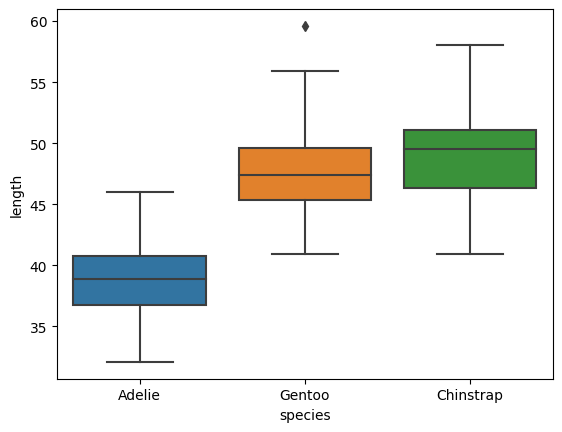

In [48]:
OTANOVA ={"length": df['bill_length_mm'], "species":df['species'], "sex":df['sex']}
OTANOVA =  pd.DataFrame(OTANOVA)
model = ols('length ~ species * sex', data=OTANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("One-way ANOVA results:")
print(anova_table)
sns.boxplot(x='species', y='length', data=OTANOVA)

If the P-value is less than or equal to the significance level, you reject the null hypothesis and conclude that not all population means are equal.

But does the middle one really counts?

Is it because of the first one or is it significantly enough? ==> Another hypothesis testing!

How can I make sure?

Multiple T/U-tests!

<h3 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Example of these stuff, on a real data!
</font>
</h3>

In [49]:
df = pd.read_csv('Stats.csv')
df['weekday'] = pd.to_datetime(df['Date']).dt.day_name()
df

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats,clusters,weekday
0,1,Synthetix,2023-08-31,1.995610,0 days 02:57:00,2.024010,0 days 02:14:00,1.923430,1.928390,43897700.0,519682000.0,1.928390,269491000.0,-0.067185,Red,-0.067220,low,1,Thursday
1,2,Synthetix,2023-08-30,2.060950,0 days 00:55:00,2.084900,0 days 03:59:00,1.995570,1.995570,31366400.0,537271000.0,1.995570,269232000.0,-0.065396,Red,-0.065380,low,1,Wednesday
2,3,Synthetix,2023-08-29,2.080950,0 days 04:46:00,2.137080,0 days 00:40:00,2.037480,2.060970,45715400.0,554878000.0,2.060970,269232000.0,-0.020060,Red,-0.019980,low,1,Tuesday
3,4,Synthetix,2023-08-28,2.107940,0 days 02:36:00,2.139600,0 days 01:46:00,2.079480,2.081030,23323500.0,560049000.0,2.081030,269121000.0,-0.026909,Red,-0.026910,low,1,Monday
4,5,Synthetix,2023-08-27,2.071460,0 days 06:44:00,2.148910,0 days 00:00:00,2.071460,2.107940,21101900.0,567291000.0,2.107940,269121000.0,0.036344,Green,0.036480,low,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,70326,Render,2022-09-06,0.500139,0 days 02:28:00,0.507269,0 days 00:13:00,0.469257,0.469789,9924320.0,119232000.0,0.469789,253799000.0,-0.030430,Red,-0.030350,low,1,Tuesday
70326,70327,Render,2022-09-05,0.516513,0 days 00:07:00,0.520092,0 days 00:49:00,0.484872,0.500219,10377500.0,126955000.0,0.500219,253799000.0,-0.016286,Red,-0.016294,low,1,Monday
70327,70328,Render,2022-09-04,0.509291,0 days 03:07:00,0.518565,0 days 08:08:00,0.497843,0.516505,4796500.0,131088000.0,0.516505,253799000.0,0.007291,Green,0.007214,low,1,Sunday
70328,70329,Render,2022-09-03,0.520313,0 days 00:50:00,0.521055,0 days 07:55:00,0.501718,0.509214,4426980.0,129238000.0,0.509214,253799000.0,-0.011092,Red,-0.011099,low,1,Saturday


Statement:

Crypto market is equally dynamic on both (Thursday, Friday, Saturday) and (Sunday, Monday, Tuesday)

x: weekends, y: weekdays

Talking about 'Price changes'

H0 : μx = μy

H1 : μx != μy 

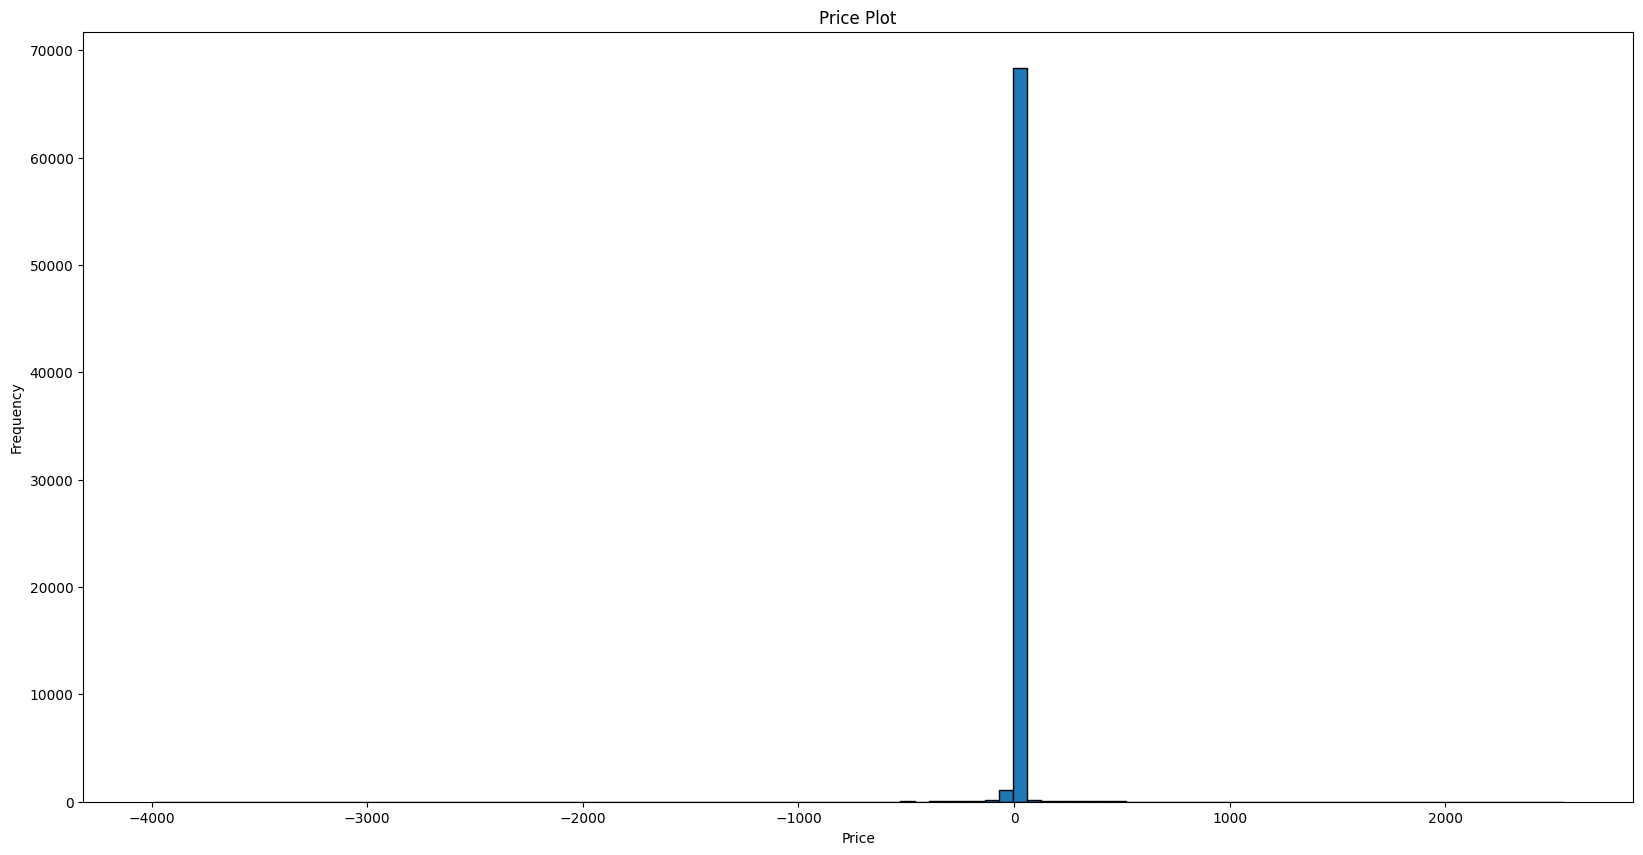

In [50]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(df['Price change'],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Price Plot')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

In [51]:
from scipy.stats import shapiro
stat, p = shapiro(df['Price change'])
p

c:\Users\ROG\anaconda3\envs\MLB\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

Data is not normal. (It's Leptokurtic.)

So we will be using U-test.

In [52]:
we = df[(df["weekday"]=='Thursday') | (df['weekday']=="Friday") | (df["weekday"]=="Saturday")]
we

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats,clusters,weekday
0,1,Synthetix,2023-08-31,1.995610,0 days 02:57:00,2.024010,0 days 02:14:00,1.923430,1.928390,43897700.0,519682000.0,1.928390,269491000.0,-0.067185,Red,-0.067220,low,1,Thursday
5,6,Synthetix,2023-08-26,2.062420,0 days 05:06:00,2.082830,0 days 00:55:00,2.052110,2.071590,14078800.0,557510000.0,2.071590,269121000.0,0.009235,Green,0.009170,low,1,Saturday
6,7,Synthetix,2023-08-25,2.074430,0 days 00:22:00,2.075320,0 days 07:49:00,2.020170,2.062360,32694900.0,555025000.0,2.062360,269121000.0,-0.012086,Red,-0.012070,low,1,Friday
7,8,Synthetix,2023-08-24,2.138410,0 days 07:25:00,2.147890,0 days 01:00:00,2.046850,2.074440,26242400.0,558277000.0,2.074440,269121000.0,-0.063833,Red,-0.063970,low,1,Thursday
12,13,Synthetix,2023-08-19,2.181630,0 days 07:06:00,2.245450,0 days 07:12:00,2.171880,2.240550,17961000.0,602595000.0,2.240550,268950000.0,0.059076,Green,0.058920,low,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70321,70322,Render,2022-09-10,0.564239,0 days 08:04:00,0.627566,0 days 01:09:00,0.560060,0.582239,24590000.0,147772000.0,0.582239,253799000.0,0.017970,Green,0.018000,low,1,Saturday
70322,70323,Render,2022-09-09,0.550511,0 days 02:43:00,0.569030,0 days 07:44:00,0.535818,0.564269,19865800.0,143211000.0,0.564269,253799000.0,0.013396,Green,0.013758,low,1,Friday
70323,70324,Render,2022-09-08,0.507117,0 days 08:05:00,0.622047,0 days 03:13:00,0.491250,0.550873,44263500.0,139811000.0,0.550873,253799000.0,0.043774,Green,0.043756,low,1,Thursday
70328,70329,Render,2022-09-03,0.520313,0 days 00:50:00,0.521055,0 days 07:55:00,0.501718,0.509214,4426980.0,129238000.0,0.509214,253799000.0,-0.011092,Red,-0.011099,low,1,Saturday


In [53]:
wd = df[(df["weekday"]=='Sunday') | (df['weekday']=="Monday") | (df["weekday"]=="Tuesday")]
wd

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats,clusters,weekday
2,3,Synthetix,2023-08-29,2.080950,0 days 04:46:00,2.137080,0 days 00:40:00,2.037480,2.060970,45715400.0,554878000.0,2.060970,269232000.0,-0.020060,Red,-0.019980,low,1,Tuesday
3,4,Synthetix,2023-08-28,2.107940,0 days 02:36:00,2.139600,0 days 01:46:00,2.079480,2.081030,23323500.0,560049000.0,2.081030,269121000.0,-0.026909,Red,-0.026910,low,1,Monday
4,5,Synthetix,2023-08-27,2.071460,0 days 06:44:00,2.148910,0 days 00:00:00,2.071460,2.107940,21101900.0,567291000.0,2.107940,269121000.0,0.036344,Green,0.036480,low,1,Sunday
9,10,Synthetix,2023-08-22,2.094780,0 days 06:59:00,2.114860,0 days 01:41:00,2.009590,2.067720,24249200.0,556154000.0,2.067720,268970000.0,-0.027208,Red,-0.027060,low,1,Tuesday
10,11,Synthetix,2023-08-21,2.149070,0 days 03:09:00,2.150930,0 days 01:13:00,2.084880,2.094920,29950200.0,563439000.0,2.094920,268955000.0,-0.054175,Red,-0.054150,low,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70319,70320,Render,2022-09-12,0.563672,0 days 04:08:00,0.583103,0 days 03:46:00,0.540043,0.569006,12824700.0,144413000.0,0.569006,253799000.0,0.005365,Green,0.005334,low,1,Monday
70320,70321,Render,2022-09-11,0.582062,0 days 01:13:00,0.600198,0 days 02:01:00,0.553060,0.563641,13357200.0,143051000.0,0.563641,253799000.0,-0.018599,Red,-0.018421,low,1,Sunday
70325,70326,Render,2022-09-06,0.500139,0 days 02:28:00,0.507269,0 days 00:13:00,0.469257,0.469789,9924320.0,119232000.0,0.469789,253799000.0,-0.030430,Red,-0.030350,low,1,Tuesday
70326,70327,Render,2022-09-05,0.516513,0 days 00:07:00,0.520092,0 days 00:49:00,0.484872,0.500219,10377500.0,126955000.0,0.500219,253799000.0,-0.016286,Red,-0.016294,low,1,Monday


In [54]:
u_statistic, p_value = sp.stats.mannwhitneyu(we["Price change"], wd["Price change"])
p_value

0.9030864344100652

So we imply that it really does not matter which set of days we choose to trade - being dynamic - wise.

But, is U-test that reliable?

What can we do to check it out?

In [55]:
Q1 = df['Price change'].quantile(0.25)
Q3 = df['Price change'].quantile(0.75)
IQR = Q3 - Q1
m = df['Price change']
m = m[(m <= Q3 + IQR*1.5) & (m >= Q1 - IQR*1.5)]
m

2       -0.019980
3       -0.026910
4        0.036480
5        0.009170
6       -0.012070
           ...   
70325   -0.030350
70326   -0.016294
70327    0.007214
70328   -0.011099
70329   -0.002837
Name: Price change, Length: 47520, dtype: float64

In [56]:
y = sp.stats.yeojohnson(m)
y

(array([-0.01946688, -0.02598678,  0.03826699, ...,  0.00728278,
        -0.01093897, -0.00282644]),
 3.6330224986446202)

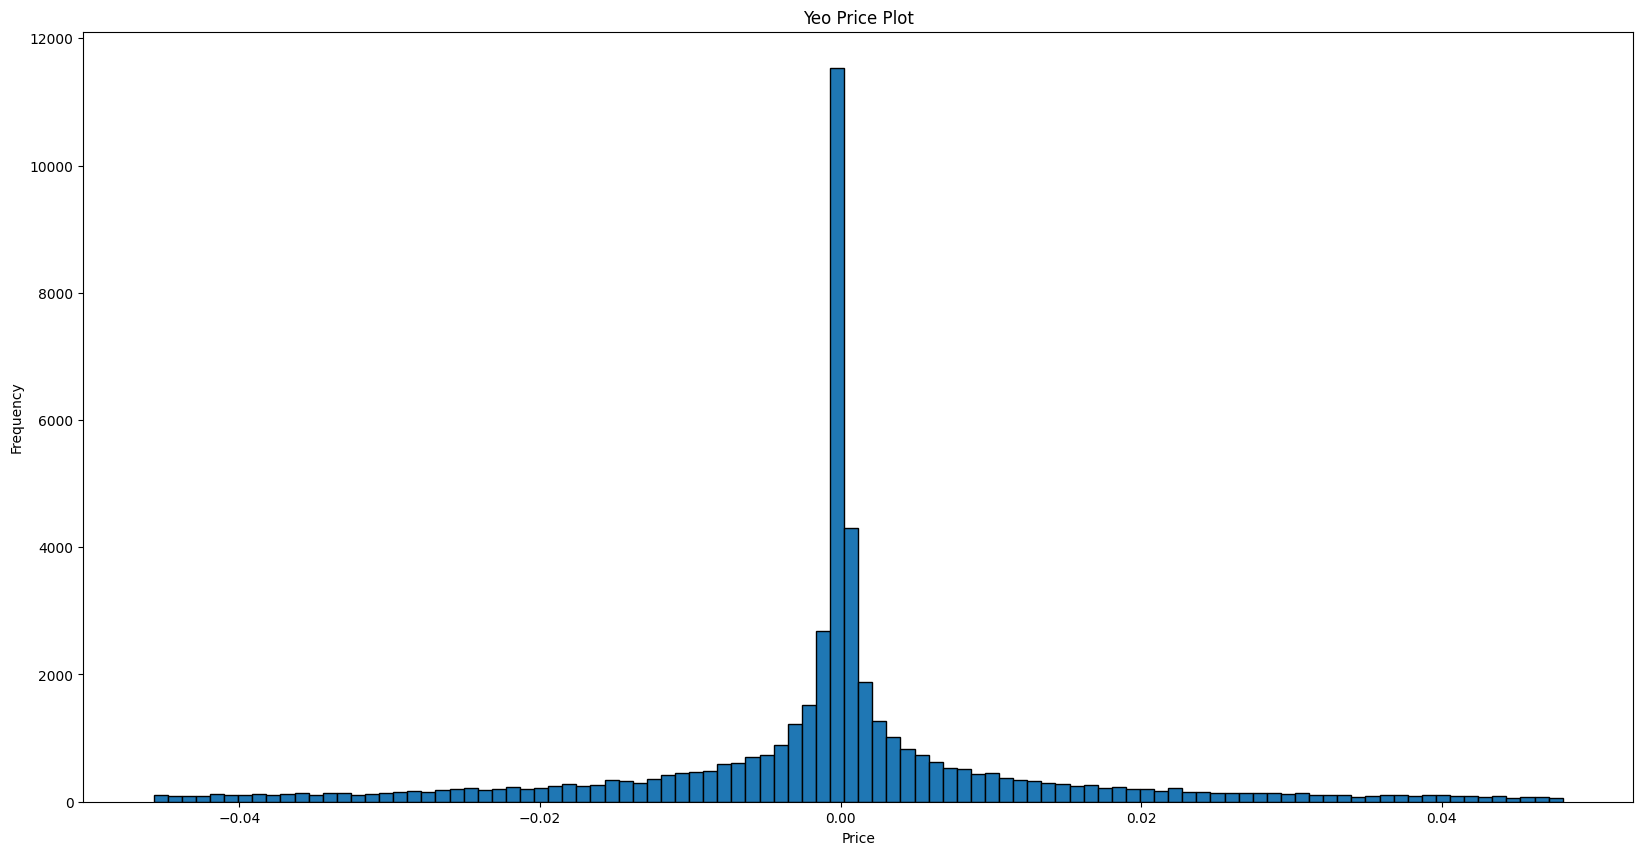

In [57]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(y[0],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Yeo Price Plot')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

In [58]:
from scipy.stats import shapiro
stat, p = shapiro(y[0])
p

c:\Users\ROG\anaconda3\envs\MLB\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

Our data is not normal-convertable!

So we will use another approach.

Does 'being dynamic' means price change?

What about abs(price change)?

In [59]:
dff = df[['weekday', 'Price change']]
dff['Price change'] = abs(dff['Price change'])
dff

C:\Users\ROG\AppData\Local\Temp\ipykernel_12376\188835924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Price change'] = abs(dff['Price change'])


,weekday,Price change
0,Thursday,0.067220
1,Wednesday,0.065380
2,Tuesday,0.019980
3,Monday,0.026910
4,Sunday,0.036480
...,...,...
70325,Tuesday,0.030350
70326,Monday,0.016294
70327,Sunday,0.007214
70328,Saturday,0.011099


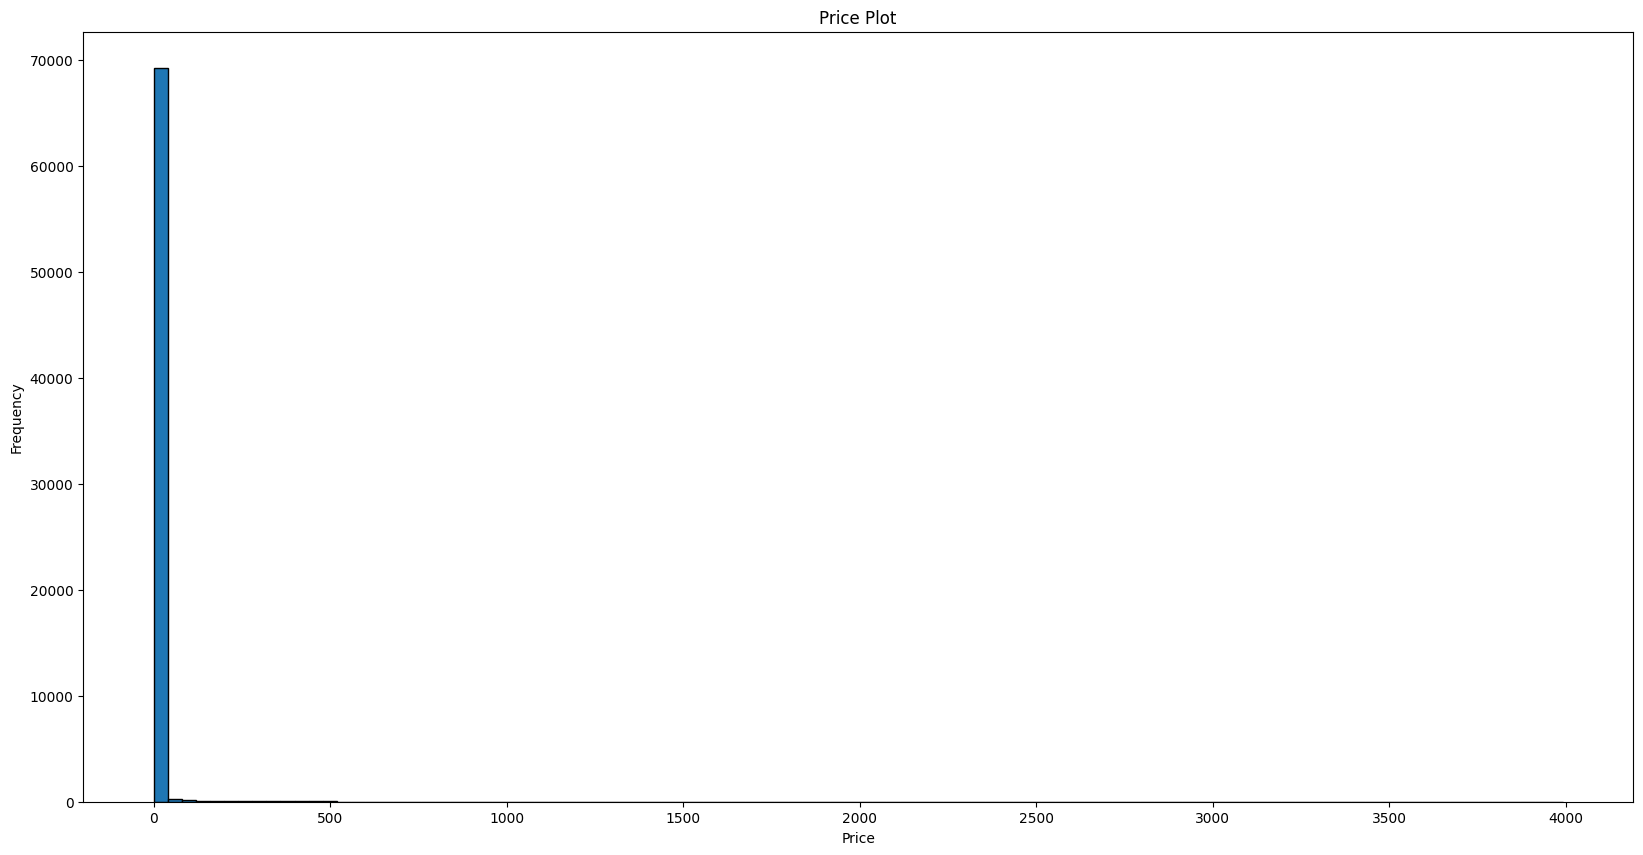

In [60]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(dff['Price change'],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Price Plot')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

In [61]:
we = dff[(dff['weekday']=='Thursday') | (dff['weekday']=='Friday') | (dff['weekday']=='Saturday')]

In [62]:
wd = dff[(dff['weekday']=='Sunday') | (dff['weekday']=='Monday') | (dff['weekday']=='Tuesday')]

In [63]:
stat, p_value = sp.stats.mannwhitneyu(we['Price change'], wd['Price change'])
p_value

0.043853418229770166

So if we are being strict and we take abs(price change) for being dynamic, it actually matters which set of days we take!

But we still are not sure about the U-test quality?!

In [64]:
cf = dff[dff['Price change']!=0]
cf

,weekday,Price change
0,Thursday,0.067220
1,Wednesday,0.065380
2,Tuesday,0.019980
3,Monday,0.026910
4,Sunday,0.036480
...,...,...
70325,Tuesday,0.030350
70326,Monday,0.016294
70327,Sunday,0.007214
70328,Saturday,0.011099


In [65]:
c, lmbda = sp.stats.boxcox(cf['Price change'])
lmbda

0.033212974360091574

In [66]:
cf = pd.concat([cf,pd.DataFrame(c)], axis =1)
cf = cf.rename(columns={0:'BC'})
cf

,weekday,Price change,BC
0,Thursday,0.06722,-2.582281
1,Wednesday,0.06538,-2.607643
2,Tuesday,0.01998,-3.669416
3,Monday,0.02691,-3.406642
4,Sunday,0.03648,-3.135434
...,...,...,...
57246,NaN,NaN,-7.013501
57400,NaN,NaN,-7.437582
63074,NaN,NaN,-3.709399
67913,NaN,NaN,0.696059


In [67]:
cf = cf[:70258]
cf

,weekday,Price change,BC
0,Thursday,0.067220,-2.582281
1,Wednesday,0.065380,-2.607643
2,Tuesday,0.019980,-3.669416
3,Monday,0.026910,-3.406642
4,Sunday,0.036480,-3.135434
...,...,...,...
70289,Wednesday,0.007209,-3.299741
70290,Tuesday,0.027121,-3.847891
70291,Monday,0.015861,-4.549008
70292,Sunday,0.010157,-4.180640


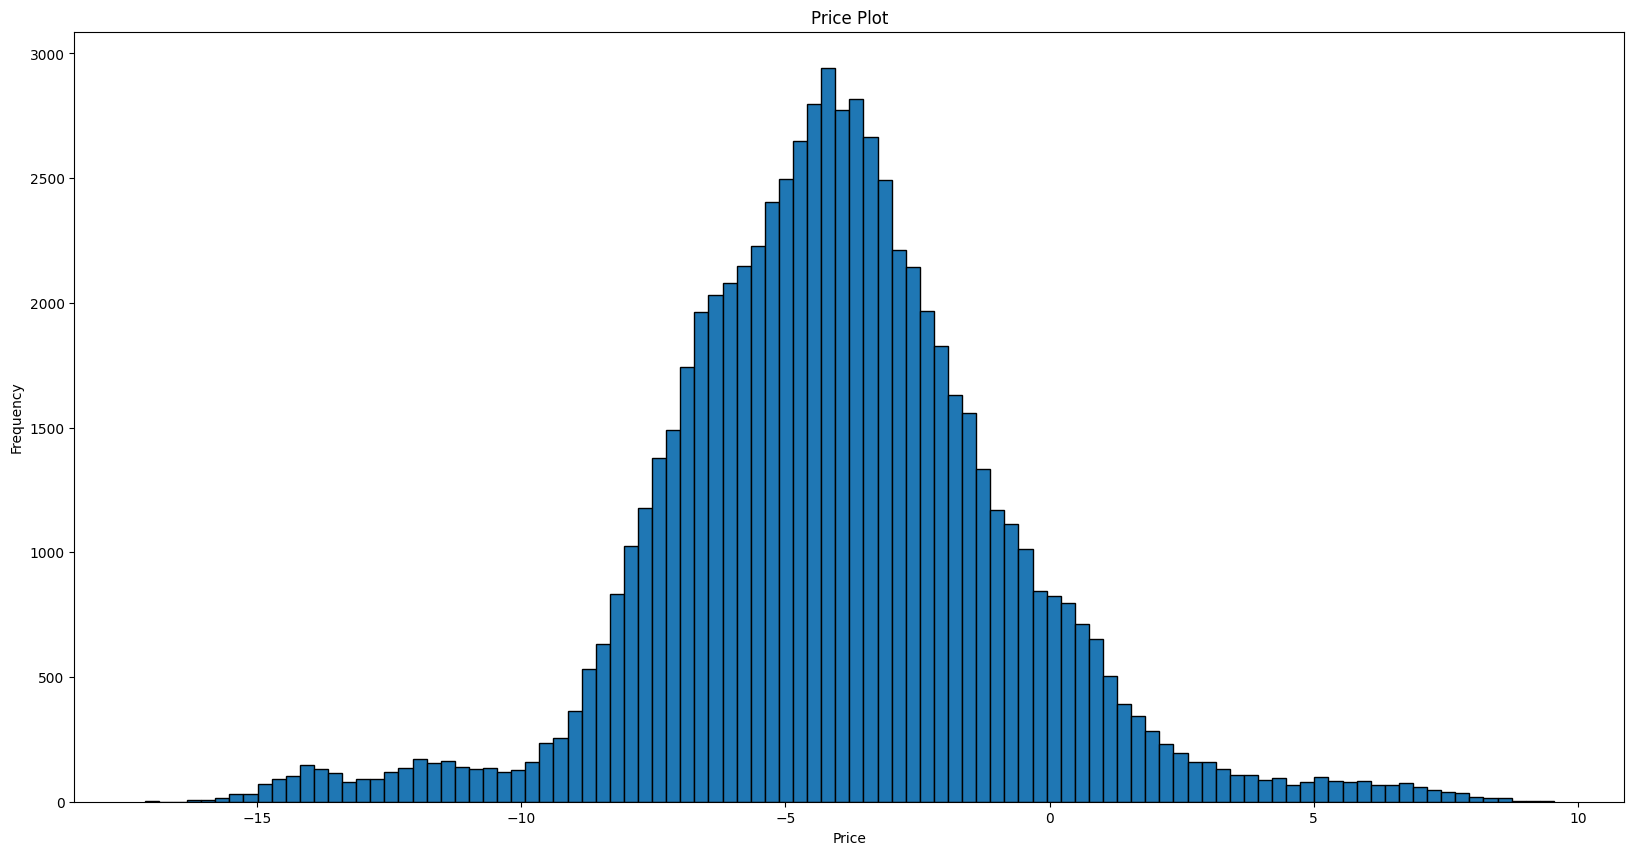

In [68]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(cf['BC'],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Price Plot')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

In [69]:
we = cf[(cf['weekday']=='Thursday') | (cf['weekday']=='Friday') | (cf['weekday']=='Saturday')]

In [70]:
wd = cf[(cf['weekday']=='Sunday') | (cf['weekday']=='Monday') | (cf['weekday']=='Tuesday')]

In [71]:
xbar = we['Price change'].mean()
ybar = wd['Price change'].mean()
stdx = we['Price change'].std()
stdy = wd['Price change'].std()
U = (xbar - ybar) / np.sqrt((stdx**2/len(we)) + (stdy**2/len(wd)))
A = (-np.inf, sp.stats.norm.ppf(.95))
U >= A[0] and U <= A[1]

True

In [72]:
p_value = sp.stats.norm.sf(abs(U))
p_value

0.28216269496623847

As you can see, considering abs of Price change we can say that weekdays are better for trading, claimed by both of tests!

As you can see, U-tests are pretty reliable!

Repeated note:

"Should I use these tests/transformations blindly using a few given rules or formulas?"

'I would maintain that including the adverb "blindly" in this question makes the answer obvious. These transformations/tests are not intended to be used as blind procedures, but rather are embedded within disciplined modeling and exploratory workflows. Blind application of either transformation or test could just as well result in a worse analysis or result.'

<h3 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Another example
</font>
</h3>

Statement:

Average volume of (BTC, ETH, USDT) is more than average volume of all other coins!

x: BTC, ETH, USDT, y: Other coins

H0 : μx > μy

H1 : μx <= μy

In [73]:
coinhis = df

In [74]:
Group1 = coinhis[(coinhis['name']=='Bitcoin')|(coinhis['name']=='Ethereum')|(coinhis['name']=='Tether USDt')]['volume']
Group2 = coinhis[(coinhis['name']!='Bitcoin')&(coinhis['name']!='Ethereum')&(coinhis['name']!='Tether USDt')]['volume']

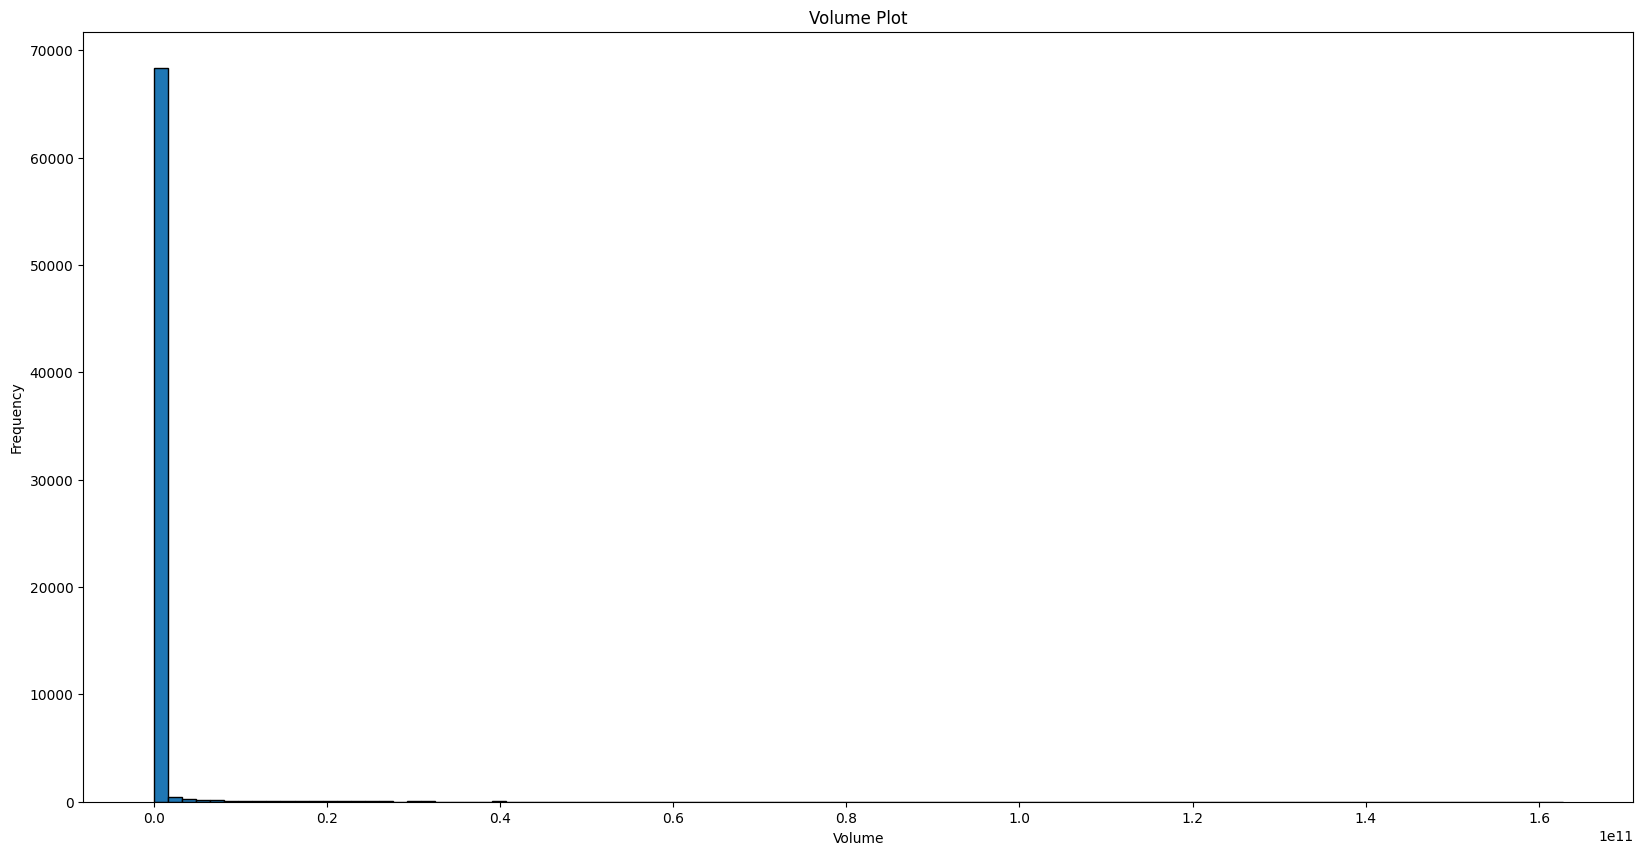

In [75]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(coinhis['volume'],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Volume Plot')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
plt.show()

In [76]:
stat, p_value = sp.stats.mannwhitneyu(Group1, Group2, alternative="less")
p_value

1.0

So our U-test implies that Group2 is less than Group1 volume-wise with P-value = 1!

Let's show that using T-test one last time, just in case.

This time using library-based T-tests.

In [77]:
dfx, lmbda = sp.stats.boxcox(coinhis['volume'])
coinhis = pd.concat([coinhis,pd.DataFrame(dfx)], axis =1)
coinhis = coinhis.rename(columns={0:'BC'})
coinhis

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus,Price change,mc_stats,clusters,weekday,BC
0,1,Synthetix,2023-08-31,1.995610,0 days 02:57:00,2.024010,0 days 02:14:00,1.923430,1.928390,43897700.0,519682000.0,1.928390,269491000.0,-0.067185,Red,-0.067220,low,1,Thursday,7.550515
1,2,Synthetix,2023-08-30,2.060950,0 days 00:55:00,2.084900,0 days 03:59:00,1.995570,1.995570,31366400.0,537271000.0,1.995570,269232000.0,-0.065396,Red,-0.065380,low,1,Wednesday,7.505149
2,3,Synthetix,2023-08-29,2.080950,0 days 04:46:00,2.137080,0 days 00:40:00,2.037480,2.060970,45715400.0,554878000.0,2.060970,269232000.0,-0.020060,Red,-0.019980,low,1,Tuesday,7.555873
3,4,Synthetix,2023-08-28,2.107940,0 days 02:36:00,2.139600,0 days 01:46:00,2.079480,2.081030,23323500.0,560049000.0,2.081030,269121000.0,-0.026909,Red,-0.026910,low,1,Monday,7.463682
4,5,Synthetix,2023-08-27,2.071460,0 days 06:44:00,2.148910,0 days 00:00:00,2.071460,2.107940,21101900.0,567291000.0,2.107940,269121000.0,0.036344,Green,0.036480,low,1,Sunday,7.449351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,70326,Render,2022-09-06,0.500139,0 days 02:28:00,0.507269,0 days 00:13:00,0.469257,0.469789,9924320.0,119232000.0,0.469789,253799000.0,-0.030430,Red,-0.030350,low,1,Tuesday,7.335872
70326,70327,Render,2022-09-05,0.516513,0 days 00:07:00,0.520092,0 days 00:49:00,0.484872,0.500219,10377500.0,126955000.0,0.500219,253799000.0,-0.016286,Red,-0.016294,low,1,Monday,7.342866
70327,70328,Render,2022-09-04,0.509291,0 days 03:07:00,0.518565,0 days 08:08:00,0.497843,0.516505,4796500.0,131088000.0,0.516505,253799000.0,0.007291,Green,0.007214,low,1,Sunday,7.216780
70328,70329,Render,2022-09-03,0.520313,0 days 00:50:00,0.521055,0 days 07:55:00,0.501718,0.509214,4426980.0,129238000.0,0.509214,253799000.0,-0.011092,Red,-0.011099,low,1,Saturday,7.203030


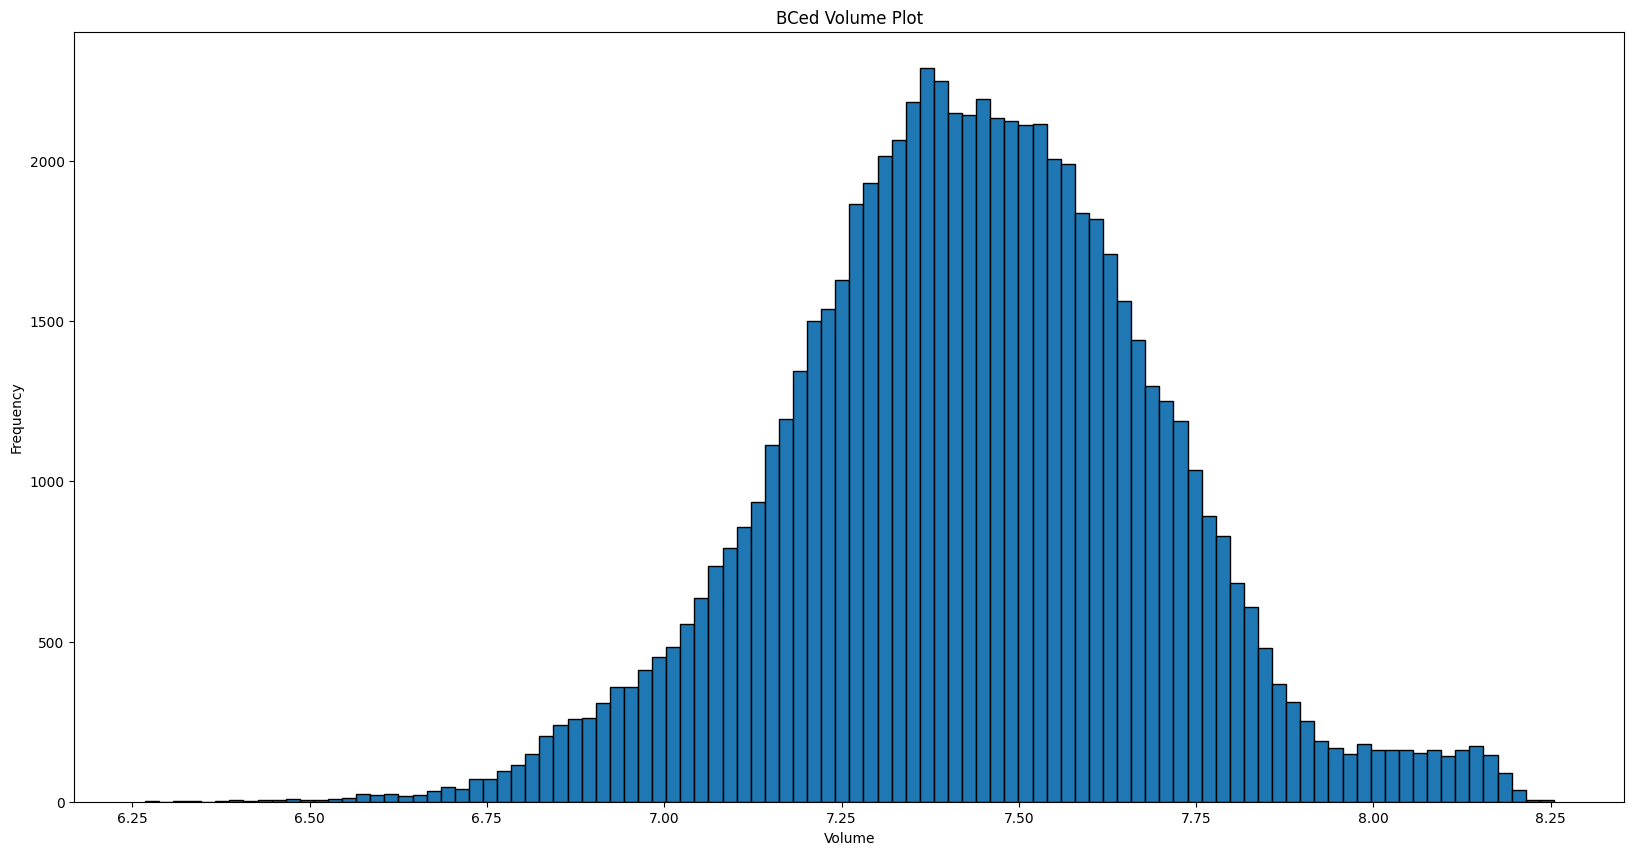

In [78]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(dfx,bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('BCed Volume Plot')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
plt.show()

So data is pretty much normal!

Note:

+ Built-in T-tests have a parameter called equal_var that is set as True by default. While using mathematical statistic, of the T-test we are covering it manually, but for SciPy T-test we must watch for variance!

In [79]:
Group1x = coinhis[(coinhis['name']=='Bitcoin')|(coinhis['name']=='Ethereum')|(coinhis['name']=='Tether USDt')]['BC']
Group2x = coinhis[(coinhis['name']!='Bitcoin')&(coinhis['name']!='Ethereum')&(coinhis['name']!='Tether USDt')]['BC']

In [80]:
Group1x.std(), Group2x.std()

(0.05076286815228848, 0.24635049832430267)

Note: Determining whether these stds are equal or not is another hypothesis test we will not go through today!

Just accept that the std of these samples are not equal!

Now that we know about the variances we can say:

In [81]:
sp.stats.ttest_ind(Group1x, Group2x, equal_var = False, alternative="less")

TtestResult(statistic=386.7352552907334, pvalue=1.0, df=2047.5636194443384)

Based on the P-value, this T-test agrees with the respective U-test too. 